<font color='red'>TOTAL: 84/100</font>
<br>
<font color='green'>COMMENT: Well done!</font>

# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 05_Assignment_2.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=05_Assignment_2.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 05_Assignment_2.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 --- [1 mark] ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [2]:
# Your code goes here
auto_numeric = pd.read_csv('datasets/train_auto_numeric.csv')

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.2 --- [1 mark] ==========
Display the first 8 instances of the dataset.

In [3]:
# Your code goes here
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.3 --- [1 mark] ==========
Display the summary statistics for the dataset.

In [4]:
# Your code goes here
# print(auto_numeric.info)
print(auto_numeric.describe())

       normalized-losses  wheel-base      length       width      height  \
count         159.000000  159.000000  159.000000  159.000000  159.000000   
mean          121.955975   98.559748  171.698113   65.729560   53.925157   
std            39.434186    5.803361   12.656791    2.292021    2.410446   
min            65.000000   86.600000  141.100000   60.300000   49.400000   
25%            93.000000   94.500000  163.400000   64.000000   52.000000   
50%           110.000000   97.000000  171.700000   65.400000   54.100000   
75%           145.000000  101.200000  177.800000   66.500000   55.600000   
max           256.000000  115.600000  202.600000   71.700000   59.800000   

       engine-size        bore      stroke  compression-ratio   engine-power  \
count   159.000000  159.000000  159.000000         159.000000     159.000000   
mean     14.056352    3.294528    3.219874          10.446855   98528.301887   
std      17.143568    0.296959    0.381833           4.414796   34123.71596

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.4 --- [2 marks] ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

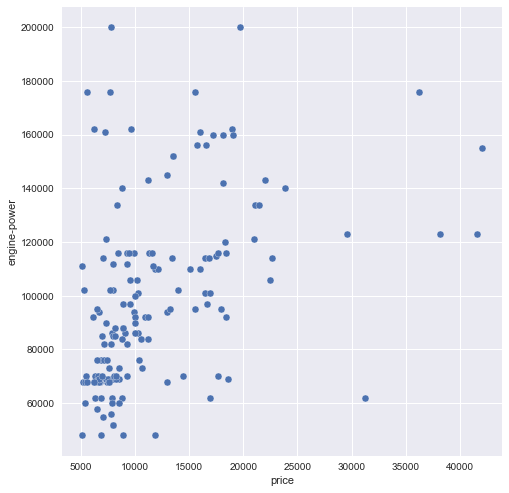

In [5]:
# Your code goes here
g = sns.pairplot(auto_numeric, size=7, x_vars = ["price"], y_vars = ["engine-power"])

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.5 --- [2 marks] ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*
#### Answer:
No, engine-power and price has very blurry correlation, which could not be used for regression. Also we could see more outliers if we visually fit a linear curve with the graph. As we have seen in theory that linear regression is much sensitive to outliers, we should definitely get rid of the outliers. Multiple attributes might help in framing the regression.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.6 --- [2 marks] ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

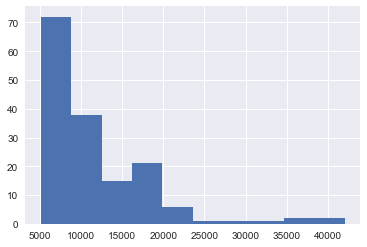

In [6]:
# Your code goes here
prices = auto_numeric['price'].copy(deep=True)
plt.hist(prices, range=[min(prices), max(prices)])
plt.show()
# plt.hist(prices, range=[0, max(prices)])

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.7 --- [2 marks] ==========
How could you preprocess the data to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*
#### Answer:

In the previous pairplot between price and engine-power, the correlation seems to get out of sync as we progress thrugh the price after 25000. Additionaly, there are fewer counts of autos that cost more than 25000. So it should be fine to consider these outliers and remove those.

Considering this a Guassian, we can perform a 95% confidence interval to find the datapoints those are close to the mean, which means they are regular annd any datapoints out of the interval will be considered outliers and removed. Alternatively, we can split the datapoints by inter quartile regions and select the ones between Q1 and Q3.

<font color='red'>TASK MARK: 0</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.8 --- [1 mark] ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [7]:
# Your code goes here
x = auto_numeric['engine-power']
y = auto_numeric['price']

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.9 --- [1 mark] ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [8]:
# Your code goes here
x = x.values.reshape(x.shape[0], 1)
x.shape

(159, 1)

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.10 --- [1 mark] ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [9]:
# Your code goes here
train_count = int(x.shape[0]*0.8)
X_train = x[0:train_count+1]
X_test = x[train_count+1: x.shape[0]+1]
y_train = y[0:train_count+1]
y_test = y[train_count+1: x.shape[0]+1]
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.11 --- [2 marks] ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [10]:
# Your code goes here
model_lr = LinearRegression(normalize = True)
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.12 --- [2 marks] ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [11]:
# Your code goes here
# As we are dealing with linear models, the LinearRegression model has few attributes like (wX + b), 
# where w = coefficient and b = intercept.
coefficient = model_lr.coef_
intercept = model_lr.intercept_
print("Price = (%5f)*(engine-power) + (%5f)" % (coefficient, intercept))

Price = (0.093644)*(engine-power) + (2289.855076)


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.13 --- [3 marks] ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*
#### Answer:
We see that 'price' and 'engine-power' are positively correlated. Having that said, the regression coefficient seems to be very less (0.1). Higher the coefficient, the more the impact the variable has on the output. Also it depends on the value of the amount of unit of 'engine-power'. To illustrate, lets take an example of an outlier, whose value should be higher.

In summary, the model might depend on two factors:
1. If the coefficient is high, which is NOT in our case.
2. If there is an outlier found. Higher values might change the coeffiecient of the LinearRegression model.

In general, normal datapoints do NOT have much influence on the model.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.14 --- [2 marks] ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

<function matplotlib.pyplot.show>

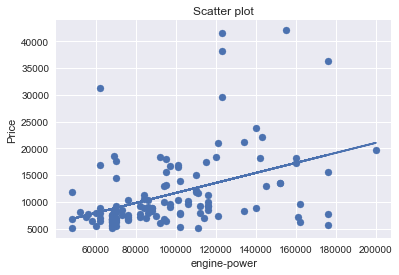

In [12]:
# Your code goes here
plt.scatter(X_train, y_train)
plt.plot(X_train, model_lr.predict(X_train), label = 'regression curve')
plt.title("Scatter plot")
plt.xlabel("engine-power")
plt.ylabel("Price")
plt.show

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.15 --- [2 marks] ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*
#### Answer:
These models could be disadvantageous for the following reasons:
1. If we are dealing with small datasets, then the model might overfit the the training data so much and that would give wrong results.
2. If the order of the datapoints are in some sort of order of certain attributes and if the relationship between the attributes and the output tend to change further. We might end up truncating such datapoints and use them for testing (development set). We can overcome this by stratified datasets.
3. Lesser the number of normal data points (nearer to the mean), less sensitive to the outliers.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.16 --- [1 mark] ==========
Now we want to use k-fold cross-validation to evaluate the performance of the regression model. Famliriase yourself with the sklearn method [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set the `shuffle` parameter to `True` and `random_state` to `0`. Use the object to print the training and validation indices for the `auto_numeric` dataset (hint: see the `split` method).

In [13]:
# Your code goes here
kf = KFold(n_splits=5, shuffle = True, random_state = 0)
# train_index, test_index = kf.split(x)
# for train_index, test_index in kf.split(x):
# #     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = x[train_index], x[test_index]
#     y_train, y_test = y[train_index], y[test_index]

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.17 --- [3 marks] ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances in each fold.

In [14]:
# Your code goes here
fold_count = 1
for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("%f - Mean of fold - %d" % (y_train.mean(), fold_count))
    fold_count += 1

11853.267717 - Mean of fold - 1
11635.976378 - Mean of fold - 2
11689.874016 - Mean of fold - 3
11709.826772 - Mean of fold - 4
11535.843750 - Mean of fold - 5


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.18 --- [3 marks] ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [15]:
# Your code goes here
model_lr_1 = LinearRegression(normalize = True)
model_lr_1.fit(X_train, y_train)
y_pred = cross_val_predict(model_lr_1, X_test, y_test, cv = kf)
assert y_test.shape == y_pred.shape
print("Predicted Y vector shape: " , (y_pred.shape))
print("Held out Y vector shape: " , (y_test.shape))



Predicted Y vector shape:  (31,)
Held out Y vector shape:  (31,)


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.19 --- [2 marks] ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [16]:
# Your code goes here
from sklearn.metrics import median_absolute_error
print("Coefficient of Determination:\t " ,model_lr_1.score(X_test, y_test)) # from the model
print("Coefficient of Determination:\t " ,r2_score(y_test, y_pred, multioutput='variance_weighted')) # from the values
print("Root Mean Squared Error:\t " ,pow(mean_squared_error(y_test, y_pred), 0.5))
print("Mean Absolute Error:\t\t " ,mean_absolute_error(y_test, y_pred))
print("Correlation Coefficient:\t " ,np.corrcoef(y_test, y_pred)[1][0]) # [0][1]

print("Median Absolute error:\t\t " ,median_absolute_error(y_test, y_pred))

Coefficient of Determination:	  0.178491660811
Coefficient of Determination:	  -0.231257912767
Root Mean Squared Error:	  8738.27328864
Mean Absolute Error:		  5190.13883824
Correlation Coefficient:	  0.0750991294155
Median Absolute error:		  2842.47625515


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.20 --- [4 marks] ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*
#### Answer:
ROCs cannot help us rank different models in case of regression. So, we are relying on regression metrics like Correlation coefficient, mean absolute and squared error. Correlation coefficient as the name states it checks for the correlation between the predicted output values and validation set values. There is a positive correlation which means they are predicted but not exactly correct. For an ideal model, the correlation coefficient would be exactly 1.0. But we have a 0.075. The model could be underfitted by the outliers.

As it should be the mean squared error is higher than the mean absolute error. The reason is we have few outliers. Annd root mean squared error is more sensitive (as they square the error function) to outliers than mean absolute errors do. This difference also confirms us that the poor performance of the model is because of the outliers. The errors seem to be higher. Also relative mean absolute errors are usually insensitive to the outliers as they pivot the metric with relative mean. Additionally, median absolute error gives a scaled down value but this does nnot hold much for our model as we are dealing with regression. We need a metric which can be differentiable to handle continous data.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.21 --- [3 marks] ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

<function matplotlib.pyplot.show>

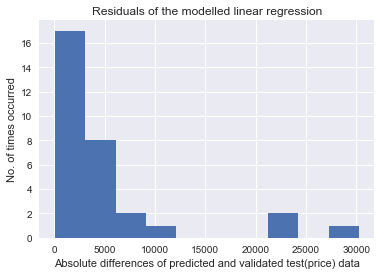

In [17]:
# Your code goes here
plt.hist(np.absolute(y_test - y_pred))
plt.title("Residuals of the modelled linear regression")
plt.xlabel("Absolute differences of predicted and validated test(price) data")
plt.ylabel("No. of times occurred")
plt.show

<font color='red'>TASK MARK: 1</font>
<br>
<font color='green'>COMMENT: -</font>

*Your answer goes here*
#### Answer:
Yes. There are a lot of correctly predicted values (i.e., bins with lesser absolute differences). As expected there are a few outlier with uch difference, which might have completely conntributed to the mean squared and absolute differences. We can also vaguely estimate the number of outlier from this histogram, we can arbitrarily set a threshold of 10000 as the absolute difference and can eliminnate any datapoints that exceed these limits. We have 4 such points. There are also many standard ways to remove outliers. We can also visualize the mean absolute error and mean squared error and the reason why mean squared error is higher than the mean absolute error.

### ========== Question 1.22 --- [2 marks] ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [18]:
# Your code goes here
auto_base = pd.read_csv('datasets/train_auto_base.csv')
# print(auto_base.info)
# print(auto_base.describe)
# print(auto_base.head(10))
X_base = auto_base["engine-power"]
y_base = auto_base["price"]
model_lr_base = LinearRegression(normalize = True)
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, train_size = 0.8, test_size=0.2, random_state=0)
X_train_base = X_train_base.values.reshape(X_train_base.shape[0], 1)
X_test_base = X_test_base.values.reshape(X_test_base.shape[0], 1) ## Never ever forget to reshape to (n,1)
kf_base = KFold(n_splits=5, shuffle = True, random_state = 0)
y_pred_base = cross_val_predict(model_lr_base, X_test_base, y_test_base, cv=kf_base)

cod = r2_score(y_test_base, y_pred_base, multioutput='variance_weighted')
rms = mean_squared_error(y_test_base, y_pred_base) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
cc = np.corrcoef(y_test, y_pred)[1][0] # [0][1]

print("Coefficient of Determination:\t " ,cod)
print("Root Mean Square Error:\t\t " ,rms)
print("Median Absolute error:\t\t " ,mae)
print("Correlation Coefficient:\t " ,cc)



Coefficient of Determination:	  -0.0727601413636
Root Mean Square Error:		  6989.77146694
Median Absolute error:		  5190.13883824
Correlation Coefficient:	  0.0750991294155


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.23 --- [2 marks] ==========
Show a scatter plot of predicted vs. true prices and another one of predicted price vs. engine-power. Use a single plot with two subplots. Label axes appropriately.

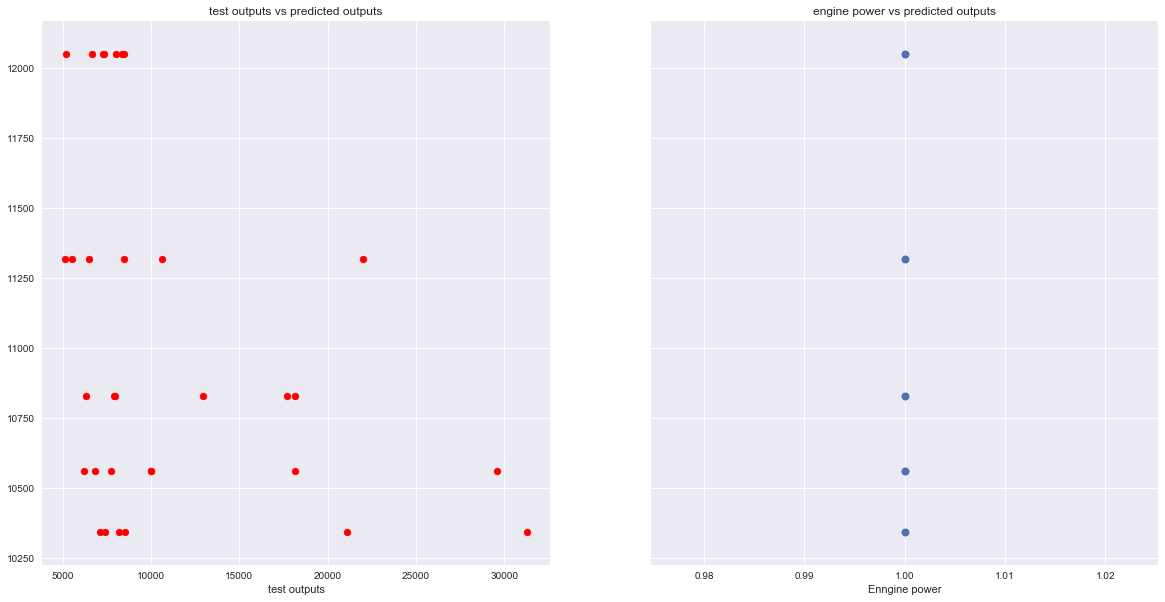

In [19]:
# Your code goes here
# engine = X_train_base['engine-power']

# Plot Histogram
# plt.hist(X_train_base, range=[min(X_train_base), max(X_train_base)])
# plt.title("Engine Size Histogram")
# plt.xlabel("Engine Size")
# plt.ylabel("Frequency")

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.figure(figsize=(200,100))
ax1.scatter(y_test_base, y_pred_base, c= "red")
ax1.set_xlabel("test outputs")
ax1.set_title('test outputs vs predicted outputs')

ax2.scatter(X_test_base, y_pred_base)
ax2.set_title('engine power vs predicted outputs')
ax2.set_xlabel("Enngine power")
f.set_figheight(10)
f.set_figwidth(20)


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.24 --- [3 marks] ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*

#### Answer:

Linear regression is always the baseline model for doing a simple regression. As we have seen in the decision trees lecture, there are a few attributes which should not be used as the deciding attributes, except for engine power value 1, the dataset does not provide any other data. As the engine power is same for every different price value, engine-power attribute is the worst attribute, we could use for price prediction with linear regression.


<font color='red'>TASK MARK: 0</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 1.25 --- [2 marks] ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics about the `auto_base` dataset.*)

In [20]:
# Your code goes here
print("Stats of the only attribute\n")
print("Mean of engine-power attribute:\t\t\t"+ str(np.mean(auto_base["engine-power"])))
print("Maximum value of engine-power attribute:\t"+ str(np.max(auto_base["engine-power"])))
print("Minimum value of engine-power attribute:\t"+ str(np.min(auto_base["engine-power"])))
print("Variance of engine-power attribute:\t\t"+ str(np.var(auto_base["engine-power"])))
print("Standard deviation of engine-power attribute:\t"+ str(np.std(auto_base["engine-power"])))
print("---------------------------------------------------")
print("Stats of the whole dataset\n")
print(auto_base.describe())

Stats of the only attribute

Mean of engine-power attribute:			1.0
Maximum value of engine-power attribute:	1.0
Minimum value of engine-power attribute:	1.0
Variance of engine-power attribute:		0.0
Standard deviation of engine-power attribute:	0.0
---------------------------------------------------
Stats of the whole dataset

       engine-power         price
count         159.0    159.000000
mean            1.0  11684.723270
std             0.0   6744.910579
min             1.0   5118.000000
25%             1.0   7372.000000
50%             1.0   9233.000000
75%             1.0  14719.500000
max             1.0  42056.000000


*Your answer goes here*
#### Answer:

The standard deviation (variance) is zero having mean as 1, which means the value of engine-power is same always (as we saw in the dataset). We have chosen the attribute poorly, that is the reason for the poor performance of the model. But there was no other option to choose a better attribute with a higher correlation (absolute, i.e., positive or negative) or a mix of attributes. engine-power attribute will not make any impact on the model even if it is mixed with multiple attributes in case of multivariate linear regression.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 --- [10 marks] ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://seaborn.github.io/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) function useful for this question.*

Correlation between the attributes
These are the top five highly correlated columns:
wheel-base  wheel-base      1.000000
            width           0.600716
            engine-size     0.280880
            stroke          0.352131
            engine-power    0.333710
dtype: float64
Correlation visualization between attributes annd price attribute


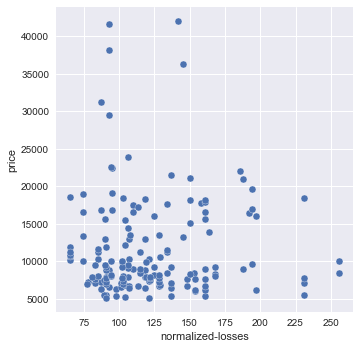

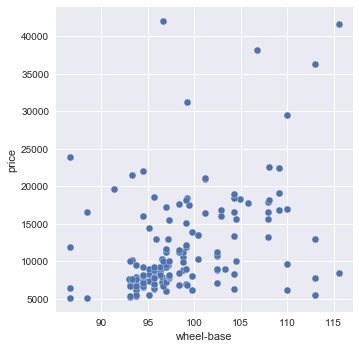

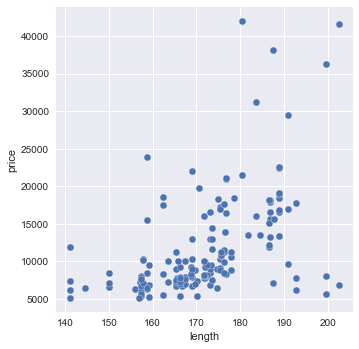

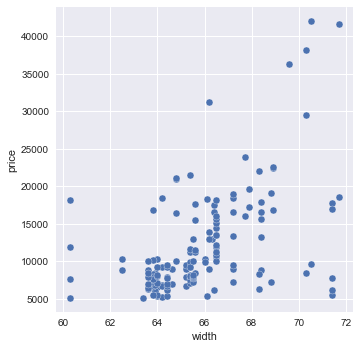

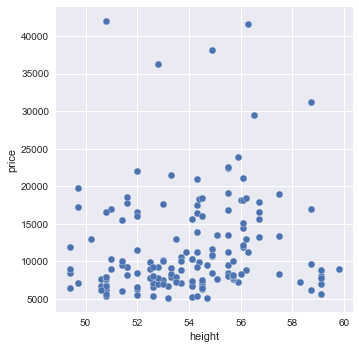

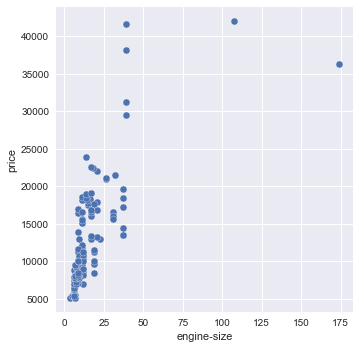

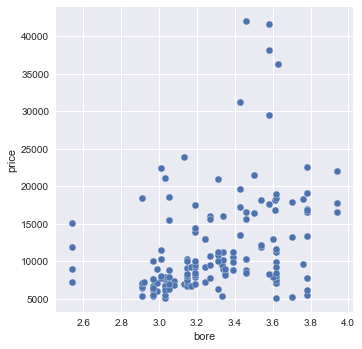

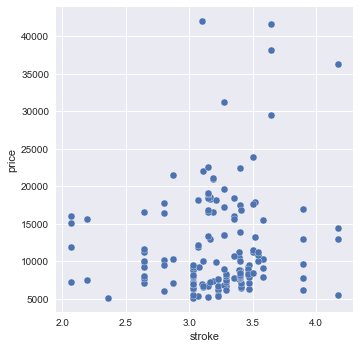

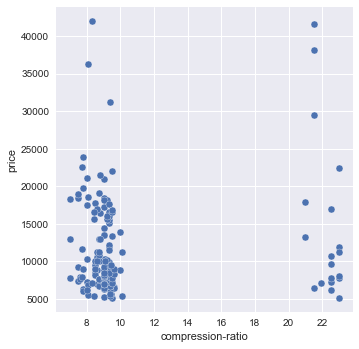

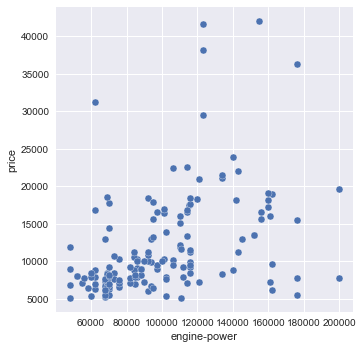

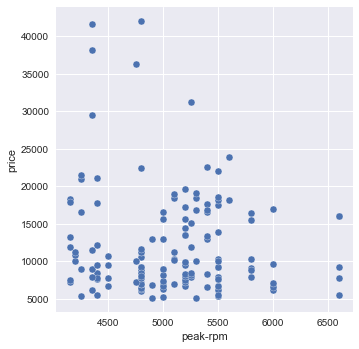

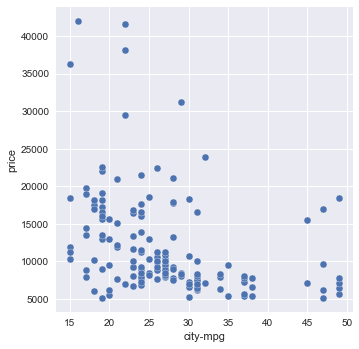

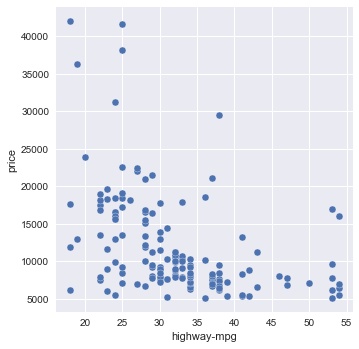

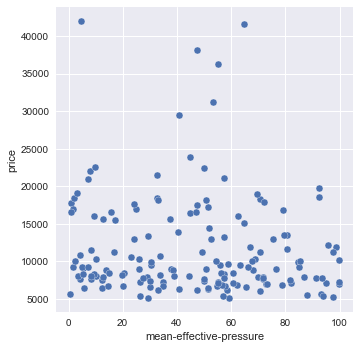

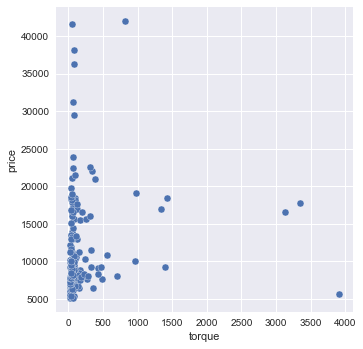

In [23]:
# Your code goes here
import heapq
auto_numeric_columns = (list(auto_numeric.columns.values))
for i in range(len(auto_numeric_columns)): # looping through the columns of dataframe
    if i is not len(auto_numeric_columns)-1:
        g = sns.pairplot(data=auto_numeric, x_vars=auto_numeric_columns[i], y_vars = "price", size = 5)
print("Correlation between the attributes")
## Terrible strategy - uncommented owing to huge computation cost and did not work! ;)
# auto_numeric_correlation_matrix = np.zeros((len(auto_numeric_columns),len(auto_numeric_columns)))
# for i in range(0, len(auto_numeric_columns)):
#         for j in range(0, len(auto_numeric_columns)):
#             auto_numeric_correlation_matrix[i][j] = np.correlate(auto_numeric[i], auto_numeric[j])
# print(auto_numeric_correlation_matrix)

col_correlations = auto_numeric.corr().abs() ## We care about both negative annd positive correlations. Both could make the model stronger.
# print(col_correlations) 
## Uncomment the previous line to see the correlation matrix
s = col_correlations.unstack()
ordered_correlations = s.sort_values(kind="quicksort", ascending= False)
print("These are the top five highly correlated columns:")
pruned_matrix = (s[len(auto_numeric_columns):len(auto_numeric_columns)+10])
print(pruned_matrix[1::2])
print("Correlation visualization between attributes annd price attribute")
## We are removing first 16 entries above as they are self correlated attribute values


*Your answer goes here*
## Answer:
As the highly correlated columns table says:

engine-size       ~       price       =       0.715125 <br>
wheel-base       ~       length       =       0.681389 <br>
city-mpg       ~       highway-mpg       =       0.641577 <br>
width       ~       wheel-base       =       0.600716 <br>
width       ~       length       =       0.569162 <br>

These are top 5 highy correlated attributes and engine-sizes and price seem to have the highest correlation.
Other attributes correlation value can also be checked from the table provide in the previous cell.

None of a single attribute seems to be correlated with the price attribute uniformly throughout the data. This has been observed from the pairplots visualization.

PS: tabs and table creation in jupyter markdown seemed time consuming, so kindly bare with the table format. Refer to the output(in the previous cell), if can't read

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.2 --- [3 marks] ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [24]:
# Your code goes here
model_multi_lr = LinearRegression(normalize = True)
X_multi = auto_numeric.copy()
X_multi = X_multi.drop("price", 1)
# print(X_multi.columns.values)
y_multi = auto_numeric["price"]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, train_size = 0.8, test_size=0.2, random_state=0)
## Reshaping is not necessary as we already have number of columns, numpy can understand this format
kf_multi = KFold(n_splits=5, shuffle = True, random_state = 0)
y_pred_multi = cross_val_predict(model_multi_lr, X_test_multi, y_test_multi, cv=kf_multi)

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.3 --- [2 marks] ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [84]:
# Your code goes here

cod_multi = r2_score(y_test_multi, y_pred_multi, multioutput='variance_weighted')
rms_multi = mean_squared_error(y_test_multi, y_pred_multi) ** 0.5
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
cc_multi = np.corrcoef(y_test_multi, y_pred_multi)[1][0] # [0][1]
print("Metric of the multivariate linear regression\n")
print("Coefficient of Determination:\t " ,cod_multi) ## Not asked in the question
print("Root Mean Square Error:\t\t " ,rms_multi)
print("Median Absolute error:\t\t " ,mae_multi)
print("Correlation Coefficient:\t " ,cc_multi)
print("---------------------------------------------------------")
# print()
# print("Metric of the univariate linear regression (engine-power and price)\n")
# print("Coefficient of Determination:\t " ,cod)
# print("Root Mean Square Error:\t\t " ,rms)
# print("Median Absolute error:\t\t " ,mae)
# print("Correlation Coefficient:\t " ,cc)

Metric of the multivariate linear regression

Coefficient of Determination:	  0.560209843092
Root Mean Square Error:		  4475.4263513
Median Absolute error:		  3300.46496431
Correlation Coefficient:	  0.803776591668
---------------------------------------------------------


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.4 --- [2 marks] ==========
 Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*
#### Answer:
As the metric comparisons presented above, the coefficient of determination, as the name states, the multivariate linear regression model is much likely to determine the output with accuracy. The values have abruptly channged to 0.5 (Though it is not so good in predicting, relatively a better model). <br><br>
Likewise the root mean square and mean absolute error have reduced abundantly from 6989 to 4475 and 5190 to 3300. Also, the correlation coefficient, is so much higher and also absolutely in a good form. It is 80% correlated with the price attribute. All the attributes combined gives a better correlation with the price.

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.5 --- [2 marks] ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

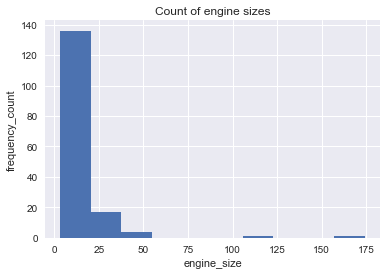

In [26]:
# Your code goes here
engine_size = auto_numeric['engine-size']
plt.hist(engine_size, range=[min(engine_size), max(engine_size)])
plt.xlabel("engine_size")
plt.ylabel("frequency_count")
plt.title("Count of engine sizes")

## Sensible value will automatically lie if the range is chosen between minimum and maximum

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.6 --- [2 marks] ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*
#### Answer:
Yes. It will cause problems as we do not know the price values for a huge range of engine-sizes. The distribution looks like a highly skewed Guassian (around the 3rd S.D(. There is huge number of datapoints around 0 - 50 and 2 datapoints around 120 and 170. The difference in range will cause problems by skewing the curve without even knowing the output for interlying datapoints.

Also they are not outliers. We cannot disregard them as outliers without knowing the price value. So, we cannot exactly tell that before visualizing the data. There are a few larger values but we cannot just ignore them without knowing the correlation of the engine size with the price (output). If the price values of those datapoints with larger engine sizes are reasonably correlated, then it is not going to cause any problems for regression.

So we have to include the values but transform it into a different space. [like a log space or an exponential space]

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.7 --- [3 marks] ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

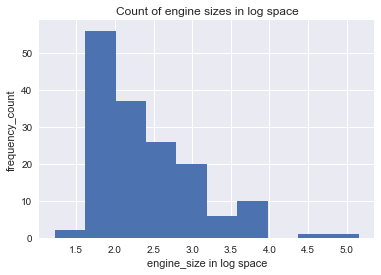

In [27]:
# Your code goes here
engine_size_log = np.log(engine_size)
plt.hist(engine_size_log, range=[min(engine_size_log), max(engine_size_log)])
plt.xlabel("engine_size in log space")
plt.ylabel("frequency_count")
plt.title("Count of engine sizes in log space")

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.8 --- [3 marks] ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [95]:
# Your code goes here
X_log = np.log(auto_numeric)
y_log = X_log["price"]
X_log = X_log.drop("price",1)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, train_size = 0.8, test_size=0.2, random_state=0)
## Reshaping is not necessary as we already have number of columns, numpy can understand this format
kf_log = KFold(n_splits=5, shuffle = True, random_state = 0)
model_lr_log = LinearRegression(normalize=True)
y_pred_log = cross_val_predict(model_lr_log, X_test_log, y_test_log, cv=kf_log)


cod_log = r2_score(y_test_log, y_pred_log, multioutput='variance_weighted')
rms_log = mean_squared_error(y_test_log, y_pred_log) ** 0.5
mae_log = mean_absolute_error(y_test_log, y_pred_log)
cc_log = np.corrcoef(y_test_log, y_pred_log)[1][0] # [0][1]
print("Metric of the log transformed multivariate linear regression\n")
print("Coefficient of Determination:\t " ,cod_log) ## Not asked in the question
print("Root Mean Square Error:\t\t " ,rms_log)
print("Median Absolute error:\t\t " ,mae_log)
print("Correlation Coefficient:\t " ,cc_log)
print("---------------------------------------------------------")
print("Metric of the multivariate linear regression\n")
print("Coefficient of Determination:\t " ,cod_multi) ## Not asked in the question
print("Root Mean Square Error:\t\t " ,rms_multi)
print("Median Absolute error:\t\t " ,mae_multi)
print("Correlation Coefficient:\t " ,cc_multi)

Metric of the log transformed multivariate linear regression

Coefficient of Determination:	  0.682976955209
Root Mean Square Error:		  0.275122333143
Median Absolute error:		  0.208485031091
Correlation Coefficient:	  0.847032799135
---------------------------------------------------------
Metric of the multivariate linear regression

Coefficient of Determination:	  0.560209843092
Root Mean Square Error:		  4475.4263513
Median Absolute error:		  3300.46496431
Correlation Coefficient:	  0.803776591668


<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.9 --- [3 marks] ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*
#### Answer:

#### The RMS and RAE are in log space, that is the reason why the values are in 0.20 and 0.27.  We cannnnot compare the error values with question 2.3 as this is inn log space annd those are in regular cartesian space. This metric is compared with the last question whose data are also in log space.


As the metric comparisons presented in the previous cell depicts, coefficient of determination and correlation coefficient have increased a bit higher. The correlation has increased as the log space has well defined all the datapoints in a linear fashion instead of a skewed pattern. This change has convinced us that the skewness affects the performance of linear regression.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.10 --- [2 marks] ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [29]:
pd.set_option('max_columns', 30)

In [30]:
# Your code goes here
auto_full = pd.read_csv('datasets/train_auto_full.csv')
print(auto_full.head(20))

    normalized-losses       make fuel-type aspiration  num-of-doors  \
0               164.0       audi       gas        std             4   
1               110.0       audi       gas        std             4   
2               158.0       audi       gas        std             4   
3               106.0       audi       gas      turbo             4   
4               192.0        bmw       gas        std             2   
5               194.0        bmw       gas        std             4   
6               188.0        bmw       gas        std             2   
7               150.0        bmw       gas        std             4   
8               121.0  chevrolet       gas        std             2   
9                98.0  chevrolet       gas        std             2   
10               93.0  chevrolet       gas        std             4   
11              231.0      dodge       gas        std             2   
12              118.0      dodge       gas        std             2   
13    

<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.11 --- [3 marks] ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*
#### Answer:
Categorical attributes:
1. make
2. fuel-type
3. aspiration
4. body-style
5. drive-wheels
6. engine-location
7. engine-type
8. fuel-system

We cannot use these categorical attributes as linear regression needs numerical data type. Every data type needs to be represented as numeric values. The only way to proceed with categorical values are assign numeric values to differentiate their classes from each other.

<font color='red'>TASK MARK: 3</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.12 --- [5 marks] ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiarise yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [82]:
# Your code goes here
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
auto_full_edit = auto_full.copy()
le = preprocessing.LabelEncoder()
# le = preprocessing.LabelEncoder()
# auto_full_edit = le.fit(auto_full_edit)
target = auto_full_edit['price']
auto_full_edit = auto_full_edit.drop('price', 1)
categorical_columns = []
columns_count = 0
for column in auto_full_edit:
    if (auto_full_edit[column].dtype == object):
        le.fit(auto_full_edit[column])
        auto_full_edit[column] = le.transform(auto_full_edit[column])
        categorical_columns.append(columns_count)
    columns_count +=1
enc = OneHotEncoder(categorical_features=categorical_columns)
enc.fit(auto_full_edit)
X_enc = enc.transform(auto_full_edit)
X_enc.shape

(159, 60)

<font color='red'>TASK MARK: 5</font>
<br>
<font color='green'>COMMENT: -</font>

In [81]:
print(X_enc)

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.00000000e+00
    4.05200000e+01   5.76800000e+01]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.00000000e+00
    4.73900000e+01   5.95900000e+01]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   1.00000000e+00
    8.50000000e-01   3.34479000e+03]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.00000000e+00
    3.25400000e+01   9.25700000e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.00000000e+00
    5.01000000e+01   6.42100000e+01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -1.00000000e+00
    9.70000000e+00   3.15830000e+02]]


### ========== Question 2.13 --- [2 marks] ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [83]:
# Your code goes here
kf_one_hot = KFold(n_splits=5, shuffle = True, random_state = 0)
model_one_hot = LinearRegression(normalize=True)
y_pred_one_hot = cross_val_predict(model_one_hot, X_enc, target, cv=kf_one_hot)

cod_one_hot = r2_score(target, y_pred_one_hot, multioutput='variance_weighted')
rms_one_hot = mean_squared_error(target, y_pred_one_hot) ** 0.5
mae_one_hot = mean_absolute_error(target, y_pred_one_hot)
cc_one_hot = np.corrcoef(target, y_pred_one_hot)[1][0] # [0][1]
print("Metric of the one hot vector transformed multivariate linear regression\n")
print("Coefficient of Determination:\t " ,cod_one_hot) ## Not asked in the question
print("Root Mean Square Error:\t\t " ,rms_one_hot)
print("Median Absolute error:\t\t " ,mae_one_hot)
print("Correlation Coefficient:\t " ,cc_one_hot)

Metric of the one hot vector transformed multivariate linear regression

Coefficient of Determination:	  0.840593111038
Root Mean Square Error:		  2684.47720601
Median Absolute error:		  1805.25903601
Correlation Coefficient:	  0.920406167248


<font color='red'>TASK MARK: 2</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.14 --- [4 marks] ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*

#### Advantage + metric evaluation:
Obviously, we can see that the correlation coefficient has increased significantly to 92%. MSE has reduced from 4475 to 2684 and MAE has reduced from 3300 to 1805. From this observation it is clear that the transformed model is performing better with more attributes. Though the raw data of few attributes are categorical, those can be transformed to numerical or cardinal by one-hot vector (many other strategies are available too).

#### Disadvantage
This complex model does one-hot vector tranformation where every data of a categorical feature is converted to an n-dimensional vector where n is the number unique classes in a categorical attribute. This costs a lot of extra memory. We should aim for a more compact way to represent categorical data.

<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: -</font>

### ========== Question 2.15 --- [4 marks] ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. Has your performance improved? Explain your answer in 1-2 sentences.

In [93]:
# Your code goes here

model_decision = RandomForestRegressor(random_state=0)
kf_decision = KFold(n_splits=5, shuffle = True, random_state = 0)
y_pred_decision = cross_val_predict(model_decision, X_test_log, y_test_log)

cod_decision = r2_score(y_test_log, y_pred_decision, multioutput='variance_weighted')
rms_decision = mean_squared_error(y_test_log, y_pred_decision) ** 0.5
mae_decision = mean_absolute_error(y_test_log, y_pred_decision)
cc_decision = np.corrcoef(y_test_log, y_pred_decision)[1][0] # [0][1]
print("Metric of the one hot vector transformed multivariate linear regression\n")
print("Coefficient of Determination:\t " ,cod_decision) ## Not asked in the question
print("Root Mean Square Error:\t\t " ,rms_decision)
print("Median Absolute error:\t\t " ,mae_decision)
print("Correlation Coefficient:\t " ,cc_decision)

Metric of the one hot vector transformed multivariate linear regression

Coefficient of Determination:	  0.390614844892
Root Mean Square Error:		  0.381440114982
Median Absolute error:		  0.291675033643
Correlation Coefficient:	  0.626174184216


*Your answer goes here*

#### Answer:
As random forest model is a collection of randomly built decision trees, the metrics of decision trees will always be smaller compared to that of the random forest. So, I am just implementing the random forest. Anyways, the model has not proved to serve better. 

#### Comparing the RMS and RAE which are in log space, now we can compare qn 2.8 and qn 2.3 as both are in same space and comparable.
As you can see those mean error values have increased and CC has dropped heavily.


<font color='red'>TASK MARK: 4</font>
<br>
<font color='green'>COMMENT: -</font>